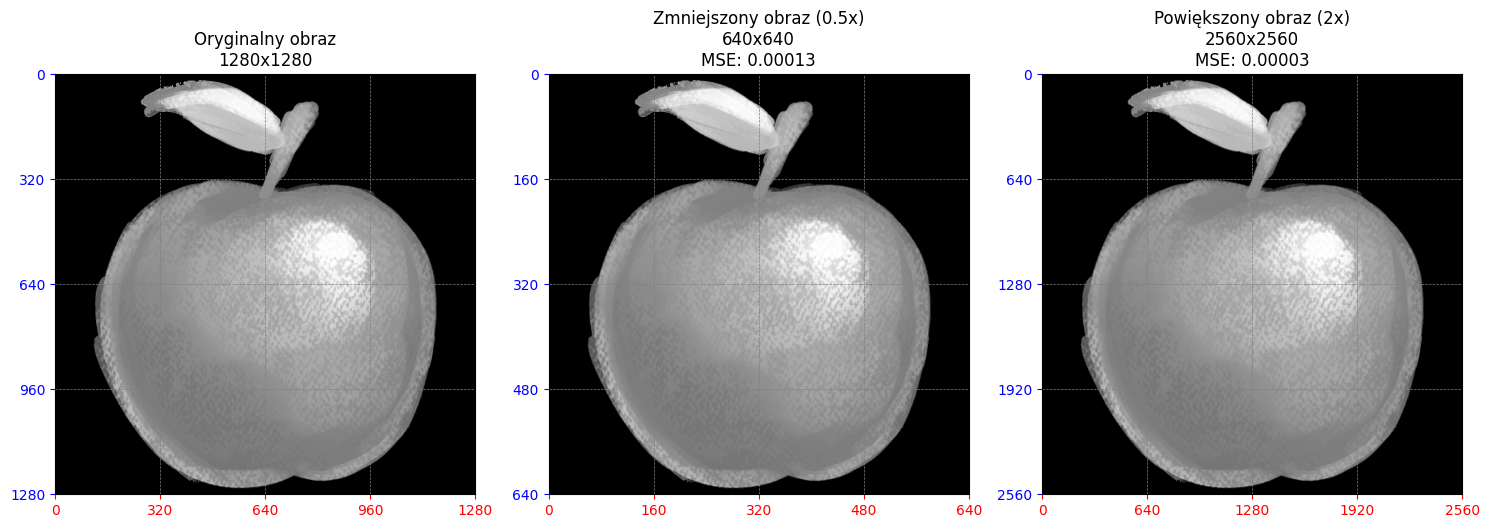

In [11]:
import numpy as np
from numpy.typing import NDArray
from skimage.util import view_as_windows
from skimage.transform import resize
import matplotlib.pyplot as plt

def downsample(image: NDArray, kernel_size: int = 2) -> NDArray:
    kernel = np.ones((kernel_size, kernel_size)) / kernel_size**2
    windows = view_as_windows(image, window_shape=(kernel_size, kernel_size), step=kernel_size)
    return np.apply_over_axes(np.sum, windows * kernel, axes=(2, 3)).squeeze()

def upscale(image: NDArray, scale_factor: int) -> NDArray:
    new_shape = (image.shape[0] * scale_factor, image.shape[1] * scale_factor)
    return resize(image, new_shape, mode='reflect', anti_aliasing=True)

def calculate_mse(original: NDArray, modified: NDArray):
    return np.mean((original - modified) ** 2)

image = plt.imread('Apple.png')
if image.ndim == 3: image = np.mean(image, axis=2)

kernel_size = 2
scale_factor = 2

scaled_down = downsample(image, kernel_size)

resized_up = upscale(scaled_down, scale_factor)

mse_down = calculate_mse(image, resized_up)

scaled_up = upscale(image, scale_factor)

resized_down = downsample(scaled_up, kernel_size)

mse_up = calculate_mse(image, resized_down)

plt.figure(figsize=(15, 10))

def plot_with_size(ax, img, title):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_xticks(np.linspace(0, img.shape[1], 5))
    ax.set_yticks(np.linspace(0, img.shape[0], 5))
    ax.set_xticklabels([f'{int(x)}' for x in np.linspace(0, img.shape[1], 5)])
    ax.set_yticklabels([f'{int(y)}' for y in np.linspace(0, img.shape[0], 5)])
    ax.tick_params(axis='x', colors='red')  # Kolor oznaczeń szerokości
    ax.tick_params(axis='y', colors='blue')  # Kolor oznaczeń wysokości
    ax.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

ax1 = plt.subplot(1, 3, 1)
plot_with_size(ax1, image, f'Oryginalny obraz\n{image.shape[0]}x{image.shape[1]}')

ax2 = plt.subplot(1, 3, 2)
plot_with_size(ax2, scaled_down, f'Zmniejszony obraz (0.5x)\n{scaled_down.shape[0]}x{scaled_down.shape[1]}\nMSE: {mse_down:.5f}')

ax3 = plt.subplot(1, 3, 3)
plot_with_size(ax3, scaled_up, f'Powiększony obraz (2x)\n{scaled_up.shape[0]}x{scaled_up.shape[1]}\nMSE: {mse_up:.5f}')

plt.tight_layout()
plt.show()
